# Module - 2

# Visualization

In [1]:
import pandas as p
import numpy as n
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('softbug.csv')

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

Text(0.5, 1.0, 'Program Length')

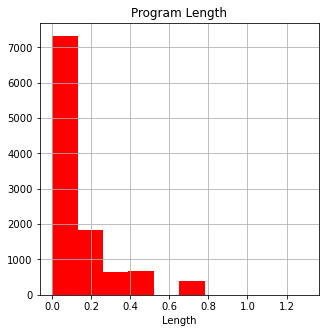

In [6]:
#Histogram for histogram_max & histogram_min
df['l'].hist(figsize=(5,5), color='r', alpha=1)
plt.xlabel('Length')
plt.title('Program Length')

Text(0.5, 1.0, 'Unique Operators')

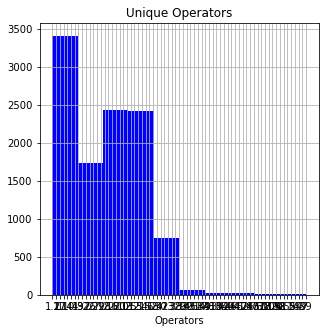

In [7]:
#Histogram for histogram_max & histogram_min
df['uniq_Op'].hist(figsize=(5,5), color='b', alpha=1)
plt.xlabel('Operators')
plt.title('Unique Operators')

Text(0.5, 1.0, 'Unique Operand')

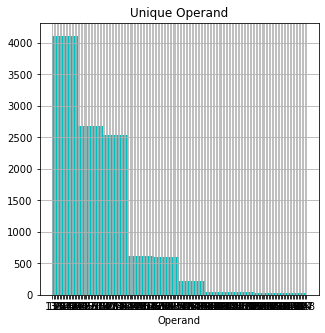

In [8]:
#Histogram for histogram_max & histogram_min
df['uniq_Opnd'].hist(figsize=(5,5), color='c', alpha=1)
plt.xlabel('Operand')
plt.title('Unique Operand')

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects']
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

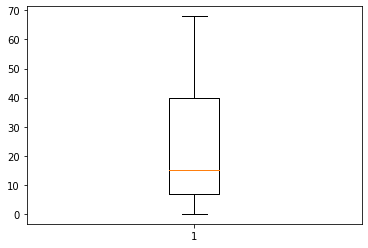

In [10]:
plt.boxplot(df['uniq_Op'])
plt.show()

<AxesSubplot:xlabel='total_Op'>

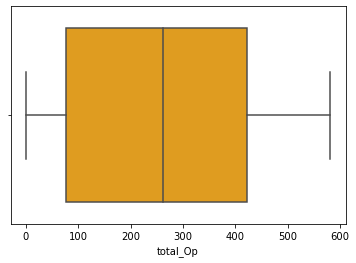

In [11]:
import seaborn as s
s.boxplot(df['total_Op'], color='orange')

In [12]:
df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

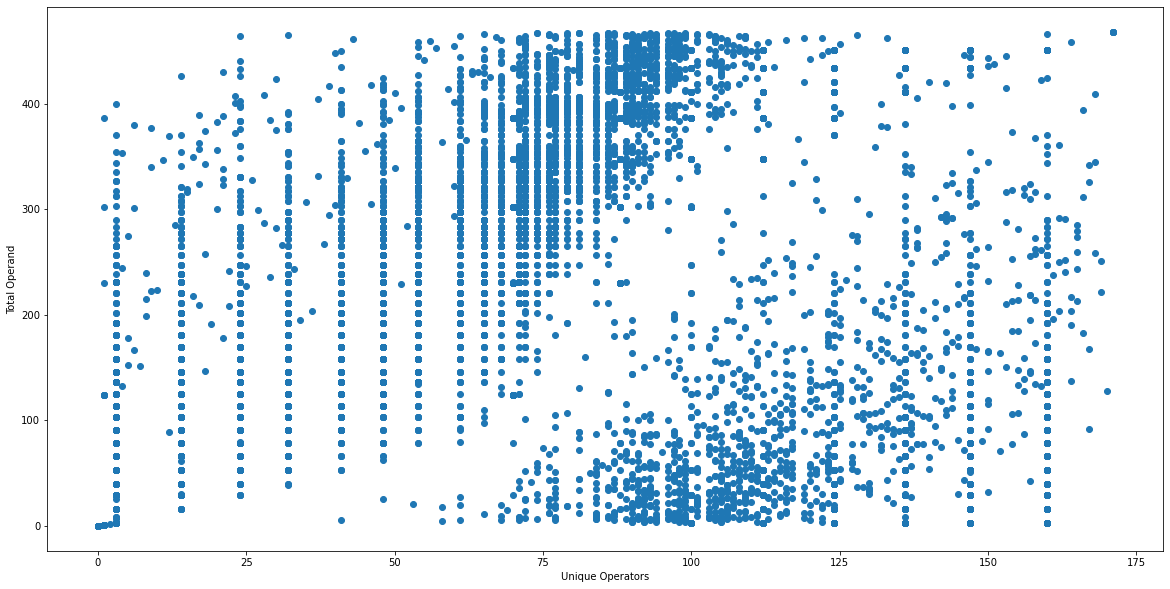

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df['uniq_Opnd'],df['total_Opnd'])
ax.set_xlabel('Unique Operators')
ax.set_ylabel('Total Operand')
plt.show()

0     30.03
1     13.14
2     10.83
3      9.92
4      7.51
      ...  
84     0.01
92     0.01
61     0.01
77     0.01
87     0.01
Name: lOBlank, Length: 95, dtype: float64

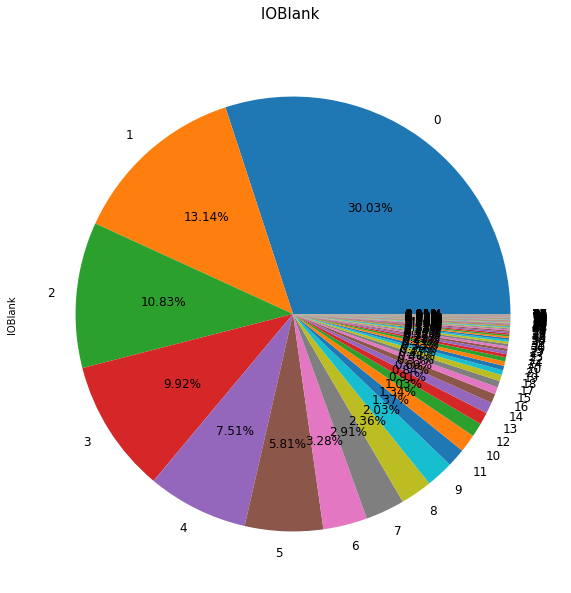

In [14]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'lOBlank')

0     12.24
6      5.89
7      5.51
65     4.97
3      4.82
      ...  
4      0.01
61     0.01
44     0.01
45     0.01
63     0.01
Name: uniq_Op, Length: 69, dtype: float64

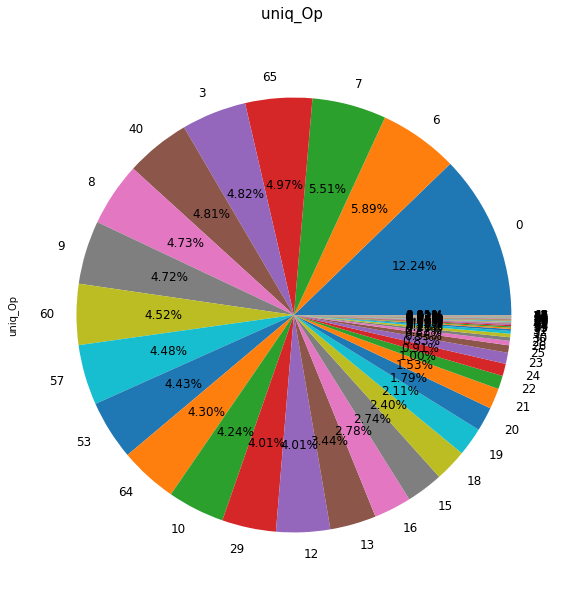

In [15]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'uniq_Op')

<AxesSubplot:>

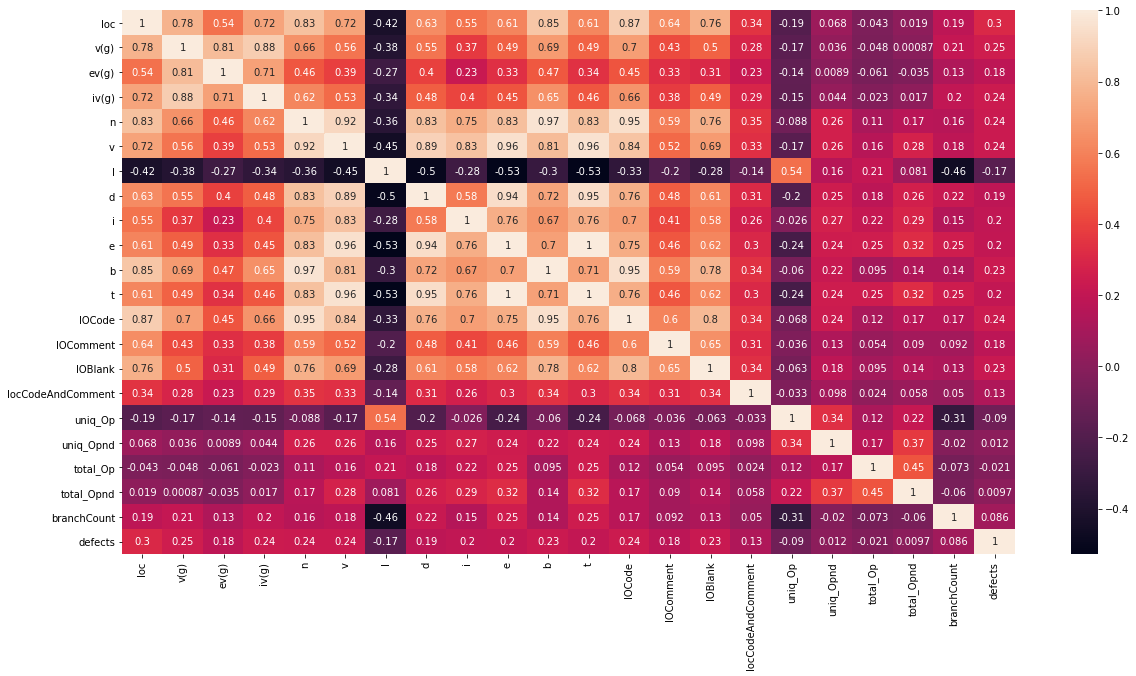

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
s.heatmap(df.corr(), ax=ax, annot=True)

In [17]:
df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

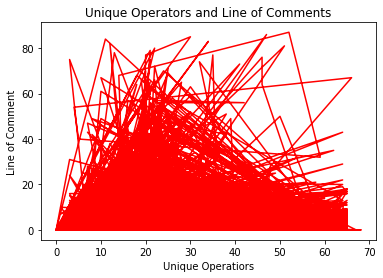

In [18]:
plt.plot(df["uniq_Op"], df["lOComment"], color='r')
plt.xlabel('Unique Operatiors')
plt.ylabel('Line of Comment')
plt.title('Unique Operators and Line of Comments')
plt.show()

In [19]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='defects', axis=1)
#Response variable
y = df.loc[:,'defects']    

In [20]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  7619
Number of test dataset:  3266
Total number of dataset:  10885
